# Данные
https://www.kaggle.com/nyctaxi/yellow-taxis
за июнь месяц

In [1]:
# будем отображать графики прямо в jupyter'e
%pylab inline
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 11,8

import numpy as np
import pandas as pd

import matplotlib

Populating the interactive namespace from numpy and matplotlib


In [2]:
taxi = pd.read_csv('/home/vorstrel/study/yellow-taxis/6june.csv', parse_dates=['pickup_datetime', 'dropoff_datetime'])

In [3]:
taxi['trip_time'] = taxi.dropoff_datetime - taxi.pickup_datetime

In [4]:
taxi['trip_time_category'] = pd.cut(
    taxi.trip_time, 
    bins=[pd.Timedelta('0'), pd.Timedelta('15m'), pd.Timedelta('30m'), pd.Timedelta('60m'), pd.Timedelta('1000D')], 
    labels=['0-15', '15-30', '30-60', '>60']
)

# График 1
#### matplotlib pandas

* какого типа переменные участвуют в визуализации - числовые (количество поездок) и категориальные(количество пассажиров)
* какова цель визуализации - оценить в одиночку или группой ездят на такси
* почему был выбран именно такой тип графика - гистограммой лучше всего показать частотное распределение

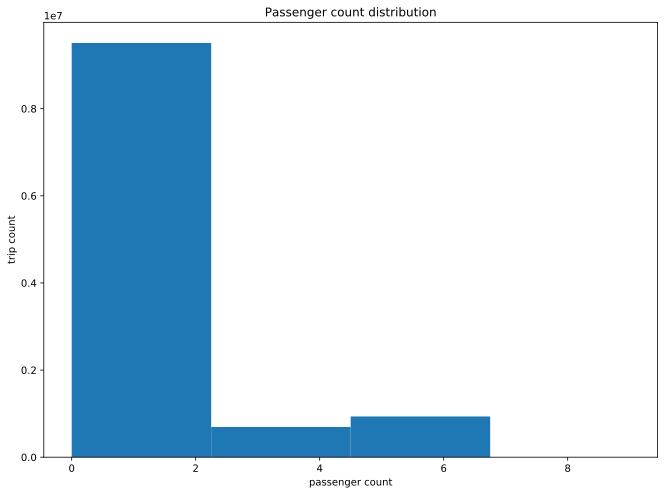

In [4]:
taxi_hist = taxi.passenger_count.hist(grid=False, bins=4)
taxi_hist.set_title('Passenger count distribution')
taxi_hist.set_xlabel('passenger count')
taxi_hist.set_ylabel('trip count')

# График 2
#### seaborn

* какого типа переменные участвуют в визуализации - числовые и две категориальных
* какова цель визуализации - оценить размер чека в такси в зависимости от типа платежа и количества пассажиров
* почему был выбран именно такой тип графика - покажет наиболее населенные пары пассажир - тип платежа

In [10]:
import seaborn as sns

In [11]:
# устраним выбросы в данных
cleaned_payments = taxi[
    (taxi.payment_amount <= 100)
    & (taxi.payment_amount > 0)
    & (taxi.trip_distance < 40)
]

In [7]:
heatmap_data = (cleaned_payments
 .groupby(['passenger_count', 'payment_type'], as_index=False)
 ['fare_amount']
 .count()
 .pivot_table(index='passenger_count', columns='payment_type', aggfunc=sum)
 .fillna(0))

/home/vorstrel/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


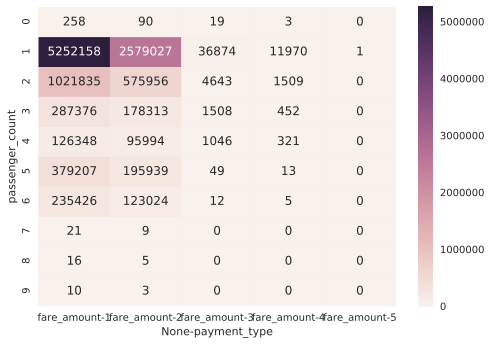

In [8]:
sns.heatmap(heatmap_data, annot=True, fmt='.0f')

# График 3
#### ggplot

* какого типа переменные участвуют в визуализации - числовые, дата (числовая непрерывная?)
* какова цель визуализации - оценить общий тренд количества перевозок и найти возможную цикличность (возможно, в выходные меньше ездят
* почему был выбран именно такой тип графика - тренд проще всего показать на line графике

In [9]:
import ggplot

/home/vorstrel/miniconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/vorstrel/miniconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/vorstrel/miniconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


/home/vorstrel/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


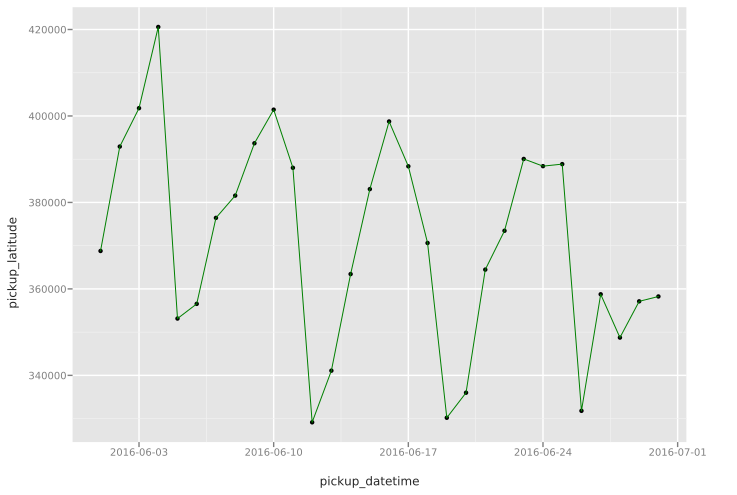

<ggplot: (8729849977271)>


In [10]:
p = (ggplot.ggplot(
        ggplot.aes(x='pickup_datetime', y = 'pickup_latitude'), 
        data = taxi.set_index('pickup_datetime').resample('1D')[['pickup_latitude']].count().reset_index())
     + ggplot.geom_point()
     + ggplot.geom_line(color='g')
     + ggplot.scale_x_date(labels='%Y-%m-%d'))
print(p)

# График 4
#### seaborn

* какого типа переменные участвуют в визуализации - числовые
* какова цель визуализации - если ли взаимосвязь между длиной поездки и ее ценой?
* почему был выбран именно такой тип графика - scatter может показать связь между двумя численными величинами

/home/vorstrel/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


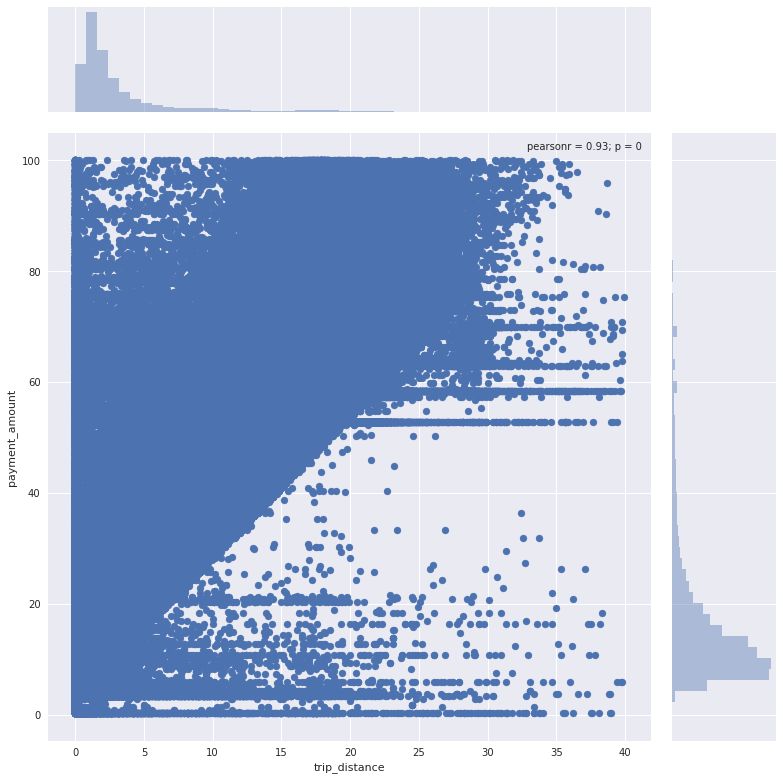

In [11]:
%config InlineBackend.figure_format = 'png'
sns.jointplot(x='trip_distance', y='payment_amount', data=cleaned_payments, kind='scatter', size=11)

# График 5
#### seaborn

* какого типа переменные участвуют в визуализации - категориальные и числовые
* какова цель визуализации - разброс размера чека от категории времени поездки
* почему был выбран именно такой тип графика - позволяет оценить разброс числовой величины в зависимости от категории

/home/vorstrel/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


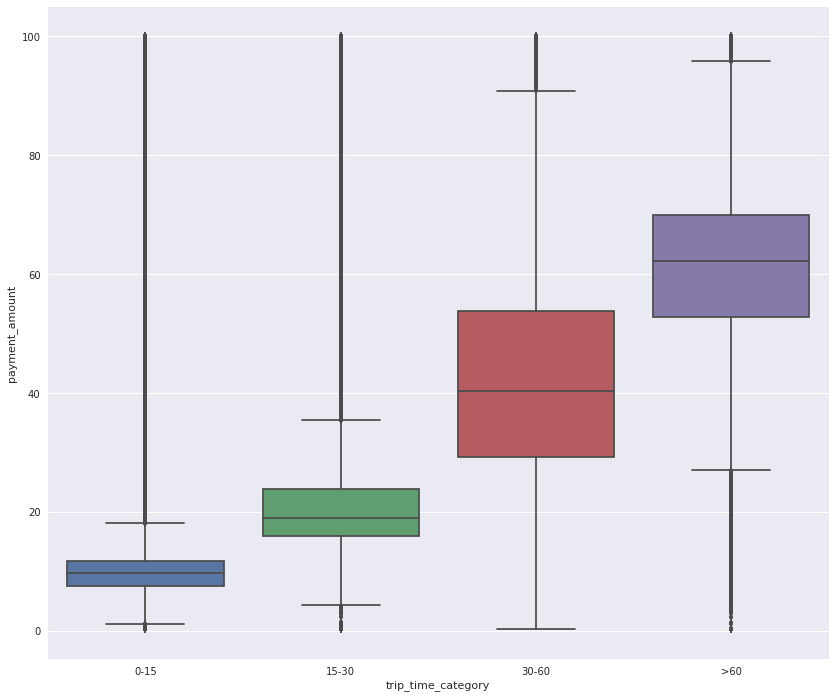

In [25]:
%config InlineBackend.figure_format = 'png'
plt.rcParams['figure.figsize']=(14,12)
sns.boxplot(x="trip_time_category", y="payment_amount", data=cleaned_payments)